## Libraries

In [10]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data

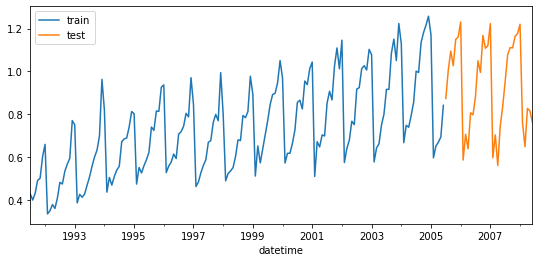

In [6]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

## Train forecaster

In [12]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                    regressor = LinearRegression(),
                    lags      = 15
                )

forecaster.fit(y=data_train)
forecaster

ForecasterAutoreg 
Regressor: LinearRegression() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Window size: 15 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 
Creation date: 2021-12-06 21:49:47 
Last fit date: 2021-12-06 21:49:47 
Skforecast version: 0.4.dev 

## Prediction

In [13]:
# Predict
# ==============================================================================
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(3)

2005-07-01    0.962395
2005-08-01    0.975943
2005-09-01    1.141913
Freq: MS, Name: pred, dtype: float64

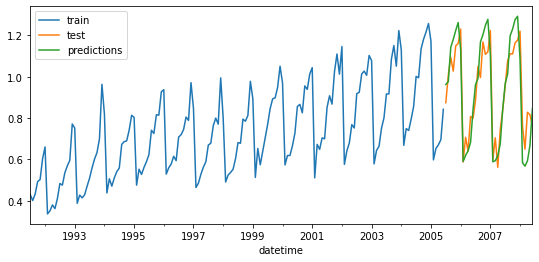

In [14]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [15]:
# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test,
                y_pred = predictions
            )
print(f"Test error (mse): {error_mse}")

Test error (mse): 0.011051937043503714


## Feature importance

In [20]:
# When using as regressor LinearRegression, Ridge or Lasso
forecaster.get_coef()

# When using as regressor RandomForestRegressor or GradientBoostingRegressor
# forecaster.get_feature_importance()

,feature,coef
0,lag_1,0.195142
1,lag_2,0.255029
2,lag_3,0.234592
3,lag_4,-0.030925
4,lag_5,-0.001666
5,lag_6,0.011375
6,lag_7,-0.039219
7,lag_8,0.019586
8,lag_9,-0.006604
9,lag_10,-0.002121


In [22]:
print(forecaster.get_coef().to_markdown())

|    | feature   |        coef |
|---:|:----------|------------:|
|  0 | lag_1     |  0.195142   |
|  1 | lag_2     |  0.255029   |
|  2 | lag_3     |  0.234592   |
|  3 | lag_4     | -0.030925   |
|  4 | lag_5     | -0.00166564 |
|  5 | lag_6     |  0.011375   |
|  6 | lag_7     | -0.0392188  |
|  7 | lag_8     |  0.0195864  |
|  8 | lag_9     | -0.00660407 |
|  9 | lag_10    | -0.00212056 |
| 10 | lag_11    |  0.0706455  |
| 11 | lag_12    |  0.926457   |
| 12 | lag_13    | -0.158592   |
| 13 | lag_14    | -0.284126   |
| 14 | lag_15    | -0.23648    |


## Extract training matrix

In [24]:
X, y = forecaster.create_train_X_y(data_train)
print(X.head()..to_markdown()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15
datetime,,,,,,,,,,,,,,,
1992-10-01,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159,0.400906,0.429795
1992-11-01,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159,0.400906
1992-12-01,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543,0.432159
1993-01-01,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369,0.492543
1993-02-01,0.751503,0.771258,0.595223,0.568606,0.534761,0.475463,0.483389,0.410534,0.361801,0.379808,0.351348,0.336220,0.660119,0.602652,0.502369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-01,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125,1.223235,1.050838
2005-03-01,0.597639,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125,1.223235
2005-04-01,0.652590,0.597639,1.170690,1.257238,1.216037,1.181011,1.134432,0.994864,1.001593,0.856803,0.795129,0.739986,0.749014,0.667989,1.130125
